In [1]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

##What is a Gated Recurrent Unit (GRU)?

A Gated Recurrent Unit (GRU) is a type of Recurrent Neural Network (RNN) that solves the vanishing gradient problem. It's a simpler and more computationally efficient alternative to the Long Short-Term Memory (LSTM) network. The GRU achieves this by using only two gates: the reset gate and the update gate.

Reset Gate (r_t): Controls how much of the previous hidden state should be forgotten.

Update Gate (z_t): Determines how much of the previous hidden state should be carried over to the current hidden state.

A Simple GRU Example: Time Series Prediction:

This example will demonstrate how a GRU can be used for a simple time series prediction task.

In [2]:
import numpy as np
def generate_time_series_data(num_samples, seq_length):
    import numpy as np
    x = np.linspace(0, 10, num_samples)
    y = np.sin(x) + np.random.normal(0, 0.1, num_samples)

    X, Y = [], []
    for i in range(len(y) - seq_length):
        X.append(y[i:i + seq_length])
        Y.append(y[i + seq_length])

    return np.array(X), np.array(Y)

# Parameters
seq_length = 10
num_samples = 200

# Prepare data
X_raw, Y_raw = generate_time_series_data(num_samples, seq_length)
X_reshaped = X_raw.reshape(X_raw.shape[0], X_raw.shape[1], 1)

# Split data
train_size = int(len(X_reshaped) * 0.8)
X_train, X_test = X_reshaped[:train_size], X_reshaped[train_size:]
Y_train, Y_test = Y_raw[:train_size], Y_raw[train_size:]

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (152, 10, 1)
Testing data shape: (38, 10, 1)


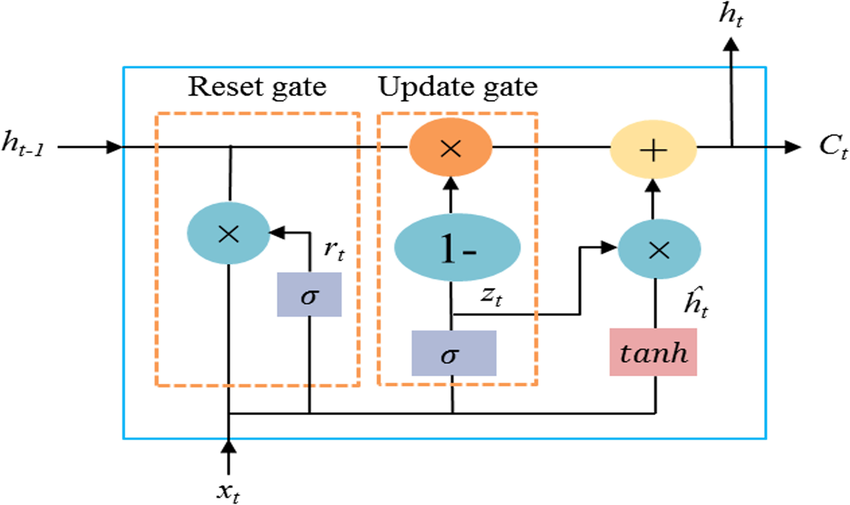

The GRU cell is a simplified variant of the LSTM cell, designed to address vanishing gradient problems and improve sequence modeling efficiency.

##Main Components
Reset gate (( r_t )): Decides how much of the past hidden state (( h_{t-1} )) to forget before combining with the current input (( x_t )).
Update gate (( z_t )): Controls the extent to which the previous hidden state is carried forward to the next time step.
Candidate hidden state (( \hat{h}_t )): Generated from the current input and reset-modified hidden state, using the tanh activation function.
Final hidden state (( h_t )): A blend of the previous hidden state and the candidate, controlled by the update gate.
##GRU Equations
[
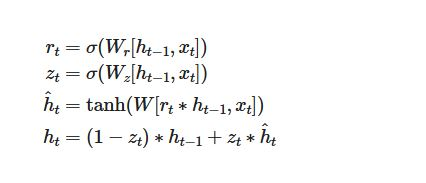
]

Where:
[ht-1,xt]
 is the sigmoid activation function,
 denotes concatenation of previous hidden state and current input.
The GRU cell’s gating mechanism allows it to retain useful information for long sequences and update its hidden state effectively.

##Build & Train the model

In [3]:
# Build the GRU model
model = Sequential()
model.add(GRU(units=50, return_sequences=False, input_shape=(seq_length, 1)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display model summary
model.summary()

# Train the model
history = model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 50)             │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,001 (31.25 KB)

 Trainable params: 8,001 (31.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - loss: 0.5798 - val_loss: 0.8598
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.4129 - val_loss: 0.5619
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2834 - val_loss: 0.3436
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1764 - val_loss: 0.1836
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1038 - val_loss: 0.0718
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0463 - val_loss: 0.0252
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0289 - val_loss: 0.0178
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0322 - val_loss: 0.0187
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0349 - val_loss: 0.0177
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0268 - val_loss: 0.0194
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0254 - val_loss: 0.0231
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0273 - val_loss: 0.0243


##Visualize the Result

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


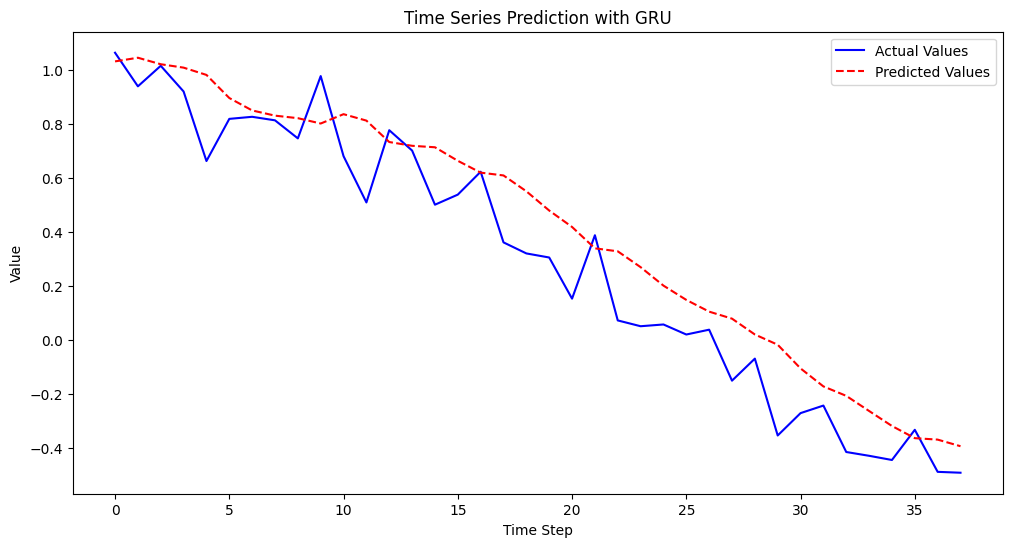

In [4]:

# Make predictions on the test set
predictions = model.predict(X_test)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(Y_test, label='Actual Values', color='blue')
plt.plot(predictions, label='Predicted Values', color='red', linestyle='dashed')
plt.title('Time Series Prediction with GRU')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()